In [112]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [113]:
all_df = pd.read_csv("data/sensor.csv")

In [114]:
all_df[:4]

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01,00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01,00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01,00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01,00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL


In [115]:
all_df.shape

(220320, 54)

In [116]:
all_df=all_df.drop(['sensor_00'], axis=1)
all_df=all_df.drop(['timestamp'], axis=1)
all_df=all_df.drop(['sensor_01'], axis=1)
all_df=all_df.drop(['sensor_50'], axis=1)
all_df=all_df.drop(['sensor_51'], axis=1)

In [117]:
all_df['machine_status'].unique()

array(['NORMAL', 'BROKEN', 'RECOVERING'], dtype=object)

In [118]:
all_df['machine_status']= all_df['machine_status'].map({'NORMAL':0, 'BROKEN': 1, 'RECOVERING': 2}).astype(int) 

In [119]:
all_df = all_df.dropna(how='any')

In [120]:
all_df.isnull().sum()

sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
machine_status    0
dtype: int64

In [121]:
all_df.shape

(213471, 49)

In [122]:
X=all_df.drop(['machine_status'], axis=1).values.astype('float64')

In [123]:
Y = all_df['machine_status'].values.astype('int64')

In [124]:
X.shape

(213471, 48)

In [125]:
Y[:5]

array([0, 0, 0, 0, 0])

In [126]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

170776

In [127]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [128]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [129]:
model = Sequential()

In [130]:
model.add(Dense(units=48*4,   input_dim=48,
                kernel_initializer='uniform', 
                activation='relu'))

In [131]:
model.add(Dense(units=48*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [132]:
model.add(Dense(units=48*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [133]:
model.add(Dense(units=48, 
                kernel_initializer='uniform', 
                activation='relu'))

In [134]:
model.add(Dense(units=3, 
                kernel_initializer='uniform',
                activation='softmax'))

In [135]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 192)               9408      
_________________________________________________________________
dense_9 (Dense)              (None, 144)               27792     
_________________________________________________________________
dense_10 (Dense)             (None, 96)                13920     
_________________________________________________________________
dense_11 (Dense)             (None, 48)                4656      
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 147       
Total params: 55,923
Trainable params: 55,923
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [137]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 153698 samples, validate on 17078 samples
Epoch 1/60
153698/153698 [==============================] - 10s 67us/step - loss: 0.2310 - acc: 0.9572 - val_loss: 0.0513 - val_acc: 0.9598
Epoch 2/60
153698/153698 [==============================] - 8s 51us/step - loss: 0.0273 - acc: 0.9846 - val_loss: 0.0072 - val_acc: 0.9980
Epoch 3/60
153698/153698 [==============================] - 8s 51us/step - loss: 0.0054 - acc: 0.9980 - val_loss: 0.0037 - val_acc: 0.9989
Epoch 4/60
153698/153698 [==============================] - 8s 51us/step - loss: 0.0032 - acc: 0.9989 - val_loss: 0.0028 - val_acc: 0.9990
Epoch 5/60
153698/153698 [==============================] - 8s 51us/step - loss: 0.0022 - acc: 0.9992 - val_loss: 0.0030 - val_acc: 0.9989
Epoch 6/60
153698/153698 [==============================] - 3s 21us/step - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0022 - val_acc: 0.9992
Epoch 7/60
153698/153698 [==============================] - 5s 33us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 

In [138]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

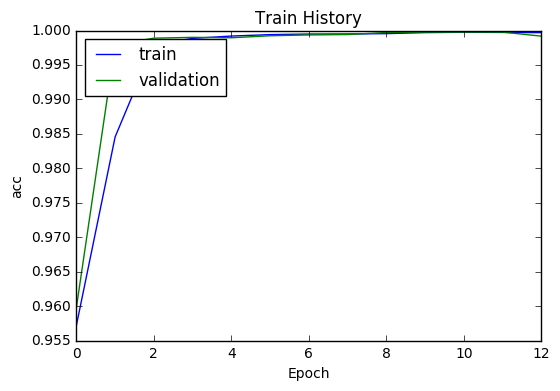

In [139]:
show_train_history(train_history,'acc','val_acc')

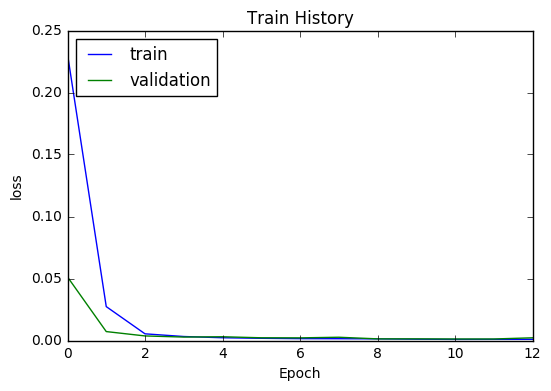

In [140]:
show_train_history(train_history,'loss','val_loss')

In [141]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

42695/42695 [==============================] - 2s 36us/step


In [142]:
scores[1]

0.9992739196627239